## Week 2 assignment

#### Objectives

The objectives of this assignment are:

1. to try out different model architectures
2. to experiment with different kinds of regularization

#### Dataset

California housing dataset from keras

#### Task

In the course material, a neural network is trained and tested to have the mean average error of approximately 0,3 (in units of 100000$), when computed with the test set containing 20% of the available labeled data. Your task is to try out some strategies for obtaining a better model, and try to achieve a lower MAE than the above.

Prepare a Jupyter notebook containing an account of the problem treatment. You do not have to present all the different experiments you have performed in detail: a short mention of the various trials is enough. However, the training and subsequent testing of the finally selected model must be presented in the notebook.

Note the following:

- You should use three separate datasets: training, validation, and test sets.
- Check out a few different model architectures (e.g. change the number of neurons in the hidden layers).
- Select the model with optimal architecture among the ones you tried. Ideally, the model should still show some signs of - - overfitting (to make sure it has enough predictive power).
- Try out some of the strategies for reducing overfitting, and pick the one leading to the most promising results.
- Train the final model once more with training and validation sets combined, and evaluate it with the test set.
- Use markdown cells to document your work.





#### Data preparation

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import california_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras import callbacks

(x_train, y_train), (x_test, y_test) = california_housing.load_data(version='small', test_split=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(480, 8) (480,)
(120, 8) (120,)


In [24]:
'''scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train /= 1e5
y_test /= 1e5'''

mean = x_train.mean(axis=0) # mean and standard deviation computed from training set only
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
y_train /= 1e5
y_test /= 1e5

'''mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
y_train /= 1e5
y_test /= 1e5'''

'mean = x_train.mean(axis=0)\nstd = x_train.std(axis=0)\nx_train -= mean\nx_train /= std\nx_test -= mean\nx_test /= std\ny_train /= 1e5\ny_test /= 1e5'

#### Modeling

In [25]:
# Callback for early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=40,
    min_delta=0.001,
    restore_best_weights=True
)

# Defining model
model = Sequential([
    Input(shape=(8,)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.03)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.02)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.03)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,921 (695.00 KB)

 Trainable params: 177,537 (693.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [26]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stop])

Best validation loss: 1.13
Best validation mae: 0.28


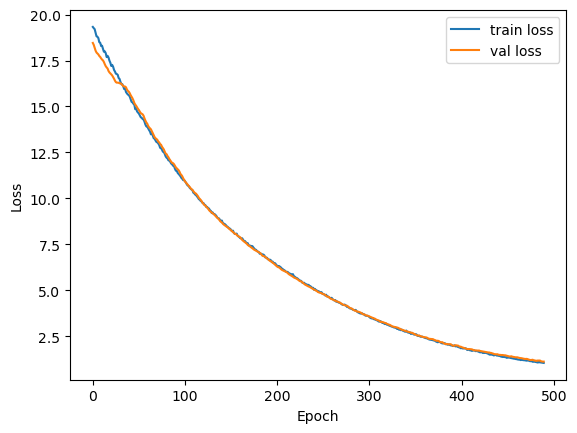

In [27]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
best_val_loss = min(history.history['val_loss'])
best_val_mae = min(history.history['val_mae'])
print(f'Best validation loss: {best_val_loss:.2f}')
print(f'Best validation mae: {best_val_mae:.2f}')

Text(0, 0.5, 'Mean absolute error (in 100000 $)')

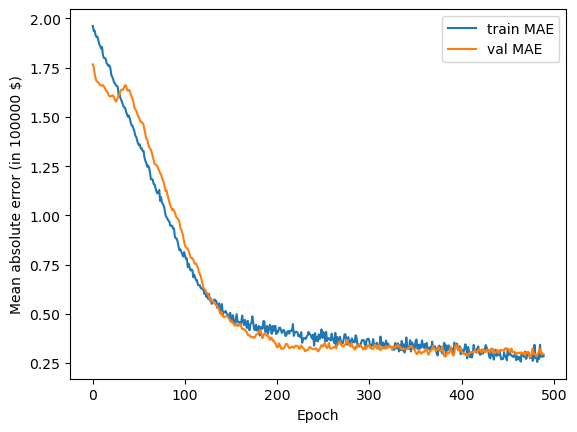

In [28]:
plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')